In [ ]:
#Setup
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


from tensorflow import keras
np.random.seed(42)
tensorflow.set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ph4450_ph4479_data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [3]:
data.shape

(1000, 28)

In [4]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [5]:
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [6]:
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [7]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
tensorflow.keras.backend.clear_session()
np.random.seed(42)
tensorflow.set_random_seed(42)

In [ ]:
#Building a neural network
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience = 10)
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=128,callbacks = [early_stopping_cb],validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/200
720/720 [==============================] - 0s 204us/sample - loss: 2.2431 - acc: 0.1958 - val_loss: 2.1559 - val_acc: 0.3000
Epoch 2/200
720/720 [==============================] - 0s 28us/sample - loss: 2.0839 - acc: 0.3042 - val_loss: 2.0440 - val_acc: 0.2889
Epoch 3/200
720/720 [==============================] - 0s 30us/sample - loss: 1.9450 - acc: 0.3417 - val_loss: 1.9100 - val_acc: 0.3500
Epoch 4/200
720/720 [==============================] - 0s 39us/sample - loss: 1.7925 - acc: 0.4139 - val_loss: 1.7794 - val_acc: 0.3889
Epoch 5/200
720/720 [==============================] - 0s 37us/sample - loss: 1.6650 - acc: 0.4403 - val_loss: 1.6749 - val_acc: 0.4556
Epoch 6/200
720/720 [==============================] - 0s 30us/sample - loss: 1.5333 - acc: 0.4792 - val_loss: 1.5668 - val_acc: 0.4389
Epoch 7/200
720/720 [==============================] - 0s 37us/sample - loss: 1.4223 - acc: 0.5056 - val_loss: 1.4846 - val_acc: 0.5167
E

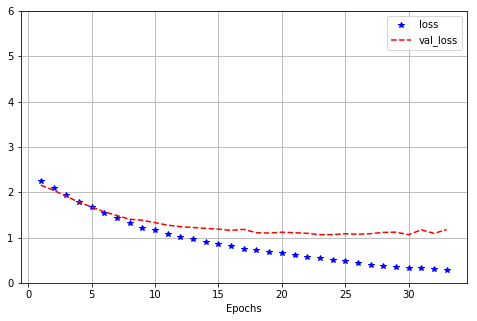

In [12]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(1,len(history.history["loss"])+1), history.history["loss"], "b*", label="loss")
plt.plot(range(1,len(history.history["val_loss"])+1), history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epochs")
plt.grid(True)
plt.gca().set_ylim(0, 6)
plt.legend()

plt.show()

In [13]:
#evaluating
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 60us/sample - loss: 1.3977 - acc: 0.7200


[1.3977086967229844, 0.72]

In [14]:
#Classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [15]:
random_forest_clf = RandomForestClassifier(n_estimators=300, random_state=42,max_depth=26, min_samples_leaf=6)
extra_trees_clf = ExtraTreesClassifier(n_estimators=300, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
dec_tree_clf = DecisionTreeClassifier(random_state=42, max_depth =26)
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)


polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
softmarg_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=3, loss="hinge")),
  ))

In [16]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf, dec_tree_clf, softmax_reg, polynomial_svm_clf, poly_kernel_svm_clf, softmarg_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class=

In [17]:
[estimator.score(X_test, y_test) for estimator in estimators]

[0.6, 0.66, 0.67, 0.67, 0.52, 0.63, 0.6, 0.69, 0.62]